<a href="https://colab.research.google.com/github/tjgwilson/MurrayDataAnalysis/blob/master/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

V5/V1 Pearsons correlation: 0.389
V5/V4 Pearsons correlation: 0.524


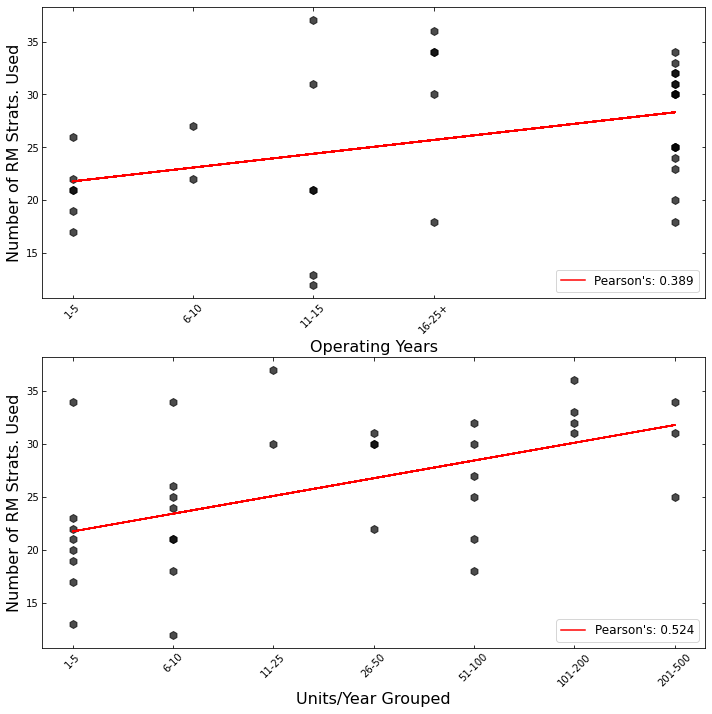

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr

####### Inport data ############
# inputData = "./questionnaireData.csv"
inputData = "https://raw.githubusercontent.com/tjgwilson/MurrayDataAnalysis/master/questionnaireData.csv"
df = pd.read_csv(inputData,header=0)
df.dropna(axis=0,inplace=True) #remove empty line
df.drop([0],inplace=True) #remove secondary column description
df.reset_index(inplace=True) #reset index
df_input = df.copy() #create copy of dataset
df = df.drop(["index"],axis=1) #drop extra index column dataset copy

####### Set order of categories ##########
#these are done partially by hand change if needed
v1_Order = ["1-5","6-10","11-15","16-20","21-25","25+"]
v2_Order = ["1-5","6-10","11-15","16-25+"]
v3_Order = ["1-5","6-10","11-25","26-50","51-100","101-200","201-500"]
v4_Order = ["1-5","6-10","11-25","26-50","51-100","101-200","201-500"]

####### Change categories to integer index #########
for ii, cat in enumerate(v1_Order):
    df.loc[df["V1"]==cat,"V1"] = ii
for ii, cat in enumerate(v2_Order):
    df.loc[df["V2"]==cat,"V2"] = ii
for ii, cat in enumerate(v3_Order):
    df.loc[df["V3"]==cat,"V3"] = ii
for ii, cat in enumerate(v4_Order):
    df.loc[df["V4"]==cat,"V4"] = ii


#########Set of figure size and other misc. ##############
fig, ax = plt.subplots(2,figsize=(10,10))
V5 = df["V5"].astype(int)


########### Plotting V5 vs V2 #############
V2 = df["V1"].astype(int)

corr, _ = pearsonr(V2, V5) #calculate the Pearson's coefficient (covarience matrix dropped)
print('V5/V1 Pearsons correlation: %.3f' % corr) #print coef.

coef = np.polyfit(V2,V5,1) #fit linear best fit using least squares regression
poly1d_fn = np.poly1d(coef) #convert fit to equation for easy plotting

ax[0].plot(V2,V5,color="black",marker="h",markersize=8,linestyle="none",alpha=0.7) #plot data
ax[0].plot(V2,poly1d_fn(V2),"r-",label="Pearson's: %.3f" % corr) #plot best fit

ax[0].set_xticks(range(0,len(v2_Order))) #adjust tick labels so categories or shown
ax[0].set_xticklabels(v2_Order,rotation=45,minor=False)

ax[0].set_xlabel("Operating Years",fontsize=16)
ax[0].set_ylabel("Number of RM Strats. Used",fontsize=16)
ax[0].legend(loc="lower right",fontsize="large")


########### Plotting V5 vs V4 #############
V4 = df["V4"].astype(int)

corr, _ = pearsonr(V4, V5)
print('V5/V4 Pearsons correlation: %.3f' % corr)

coef = np.polyfit(V4,V5,1)
poly1d_fn = np.poly1d(coef)

ax[1].plot(V4,V5,color="black",marker="h",markersize=8,linestyle="none",alpha=0.7)
ax[1].plot(V4,poly1d_fn(V4),"r-",label="Pearson's: %.3f" % corr)

ax[1].set_xticks(range(0,len(v4_Order)))
ax[1].set_xticklabels(v4_Order,rotation=45,minor=False)

ax[1].set_xlabel("Units/Year Grouped",fontsize=16)
ax[1].set_ylabel("Number of RM Strats. Used",fontsize=16)
ax[1].legend(loc="lower right",fontsize="large")

####### figure adjustments ########
for a in ax.flat:
    a.tick_params(which='both',direction='in',bottom=True,top=True,left=True,right=True)

fig.subplots_adjust(left=0.06,right=0.98,bottom=0.09,top=0.98)

plt.show()
